In [ ]:
#Movies_Recommendation System

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel

# Loading "CREDITS" data

In [2]:
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
credits.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
credits.shape

(4803, 4)

In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


Observations:
    1. Can get 'Director' information from 'crew'
    2. Can derive 'Actors' information from 'cast'

In [6]:
credits['crew'] = credits['crew'].apply(literal_eval)
credits['cast'] = credits['cast'].apply(literal_eval)

In [7]:
#Director

def get_director(x):
    for i in x:
        if i.get('job') == 'Director':
                return i['name']
    return np.NaN

credits['Director'] = credits['crew'].map(lambda x:get_director(x))


In [8]:
credits.head(2)

,movie_id,title,cast,crew,Director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski


In [9]:
#Actors

def get_actor(x):
    cast = []
    for i in x:
        cast.append(i.get('name'))        
    if cast == []:
        return np.NaN
    else:
        return cast
    
credits['Actors'] = credits['cast'].map(lambda x:get_actor(x)) 
    

In [10]:
credits.head(2)

,movie_id,title,cast,crew,Director,Actors
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."


In [11]:
credits.drop(columns = ['cast','crew'],inplace = True)

In [12]:
credits.head(2)

,movie_id,title,Director,Actors
0,19995,Avatar,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."


# Loading "MOVIES" dataset

In [13]:
movies = pd.read_csv("tmdb_5000_movies.csv")

In [14]:
movies.shape

(4803, 20)

In [15]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [16]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [17]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Observations :
    - 'budget','homepage','original_language','production_companies','production_countries','release_date', 'revenue', 'runtime',
      'runtime','spoken_languages', 'status', 'tagline' are not necessary for recommendation

In [18]:
movies.drop(columns = ['budget','homepage','original_language','production_companies','production_countries','release_date', 'revenue', 'runtime',
      'runtime','spoken_languages', 'status', 'tagline'],inplace = True)

In [19]:
movies.head(2)

,genres,id,keywords,original_title,overview,popularity,title,vote_average,vote_count
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500


In [20]:
movies['genres'] = movies['genres'].apply(literal_eval)
movies['keywords'] = movies['keywords'].apply(literal_eval)

In [21]:
#Genres

def get_genres(x):
    gen = []
    for i in x:
        gen.append(i.get('name'))
    if gen == []:
        return np.NaN
    else:
        return gen
    
movies['Genres'] = movies['genres'].map(lambda x:get_genres(x))

In [22]:
movies.head(2)

,genres,id,keywords,original_title,overview,popularity,title,vote_average,vote_count,Genres
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"


In [23]:
#Keywords

def get_keywords(x):
    key = []
    for i in x:
        key.append(i.get('name'))
    if key == []:
        return np.NaN
    else:
        return key
    
movies['Keywords'] = movies['keywords'].map(lambda x:get_genres(x))

In [24]:
movies.head(2)

,genres,id,keywords,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords
0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."


Note: Now, we can remove 'keywords' and 'genres' columns

In [25]:
movies.drop(columns = ['keywords','genres'],inplace = True)

In [26]:
movies.head(2)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ..."


# Merging two datasets

In [27]:
movies.columns

Index(['id', 'original_title', 'overview', 'popularity', 'title',
       'vote_average', 'vote_count', 'Genres', 'Keywords'],
      dtype='object')

In [28]:
credits.columns

Index(['movie_id', 'title', 'Director', 'Actors'], dtype='object')

In [29]:
credits.rename(columns = {'movie_id':'id'},inplace = True)

In [30]:
data = movies.merge(credits,how = 'inner',on = ['id','title'])

In [31]:
data.head(3)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R..."


In [32]:
data.isnull().sum()

id                  0
original_title      0
overview            3
popularity          0
title               0
vote_average        0
vote_count          0
Genres             28
Keywords          412
Director           30
Actors             43
dtype: int64

In [33]:
data = data.fillna('')

In [34]:
data.isnull().sum()

id                0
original_title    0
overview          0
popularity        0
title             0
vote_average      0
vote_count        0
Genres            0
Keywords          0
Director          0
Actors            0
dtype: int64

# We are good to go now!!!!!

# Using weighted Average for each movie rating

In [ ]:
W = Weighted Rating
R = Average for the movie as a number from 0 to 100 
V = Votes for the movie
M = Min votes required to be listed in the 250
C = The mean vote across the whole report

In [ ]:
W = (RV+CM)/V+M

In [35]:
R = data['vote_average']
V = data['vote_count']
M = data['vote_count'].quantile(0.70)
C = data['vote_average'].mean()

In [36]:
data['Weighted_Average_Rating'] = ((R*V)+(C*M))/(V+M)

In [37]:
data.head(2)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors,Weighted_Average_Rating
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.148013
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.807627


In [38]:
data_1 = data.sort_values(by = 'Weighted_Average_Rating',ascending = False)

In [39]:
new_df = data_1[['original_title', 'vote_count', 'vote_average', 'Weighted_Average_Rating', 'popularity']]

In [40]:
new_df.head(5)

,original_title,vote_count,vote_average,Weighted_Average_Rating,popularity
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
3337,The Godfather,5893,8.4,8.192887,143.659698
662,Fight Club,9413,8.3,8.171648,146.757391
3232,Pulp Fiction,8428,8.3,8.157615,121.463076
65,The Dark Knight,12002,8.2,8.102674,187.322927


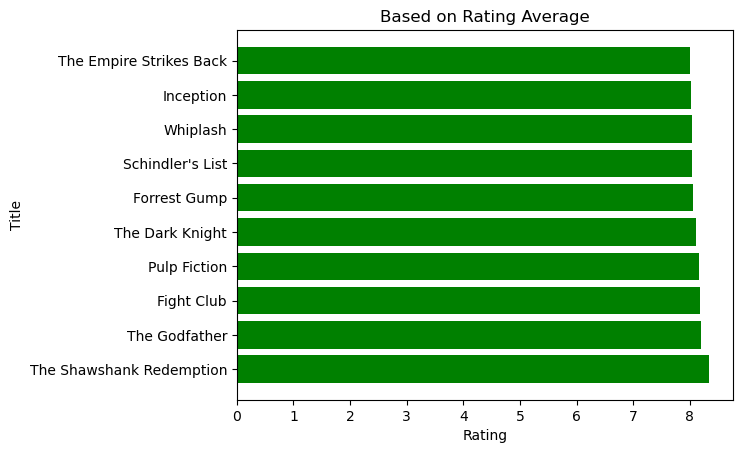

In [41]:
plt.barh(new_df['original_title'].head(10),new_df['Weighted_Average_Rating'].head(10),color = 'green')
plt.title("Based on Rating Average")
plt.xlabel('Rating')
plt.ylabel('Title')
plt.show()

# Based On Popularity

In [42]:
populartity = new_df.sort_values(by = 'popularity',ascending = False)

In [43]:
populartity.head(5)

,original_title,vote_count,vote_average,Weighted_Average_Rating,popularity
546,Minions,4571,6.4,6.365286,875.581305
95,Interstellar,10867,8.1,7.998100,724.247784
788,Deadpool,10995,7.4,7.334360,514.569956
94,Guardians of the Galaxy,9742,7.9,7.798252,481.098624
127,Mad Max: Fury Road,9427,7.2,7.135687,434.278564


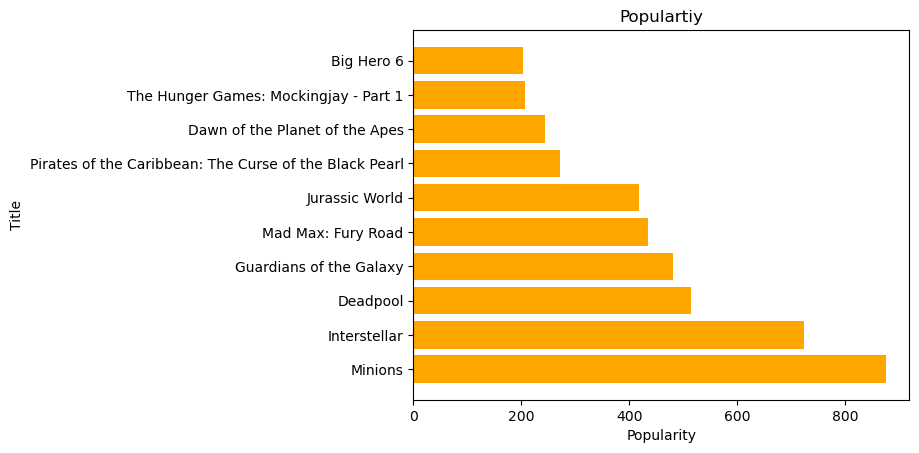

In [44]:
plt.barh(populartity['original_title'].head(10),populartity['popularity'].head(10),color = 'orange')
plt.title("Populartiy")
plt.xlabel('Popularity')
plt.ylabel('Title')
plt.show()

# Recommendation based on Both Average Rating and Popularity 

In [45]:
scaling=MinMaxScaler()
scaled_df=scaling.fit_transform(data[['Weighted_Average_Rating','popularity']])
movie_normalized_df=pd.DataFrame(scaled_df,columns=['Weighted_Average_Rating','popularity'])
movie_normalized_df.head()

/Users/pragna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/pragna/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


,Weighted_Average_Rating,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [46]:
data[['normalized_weight_average','normalized_popularity']]= movie_normalized_df

In [47]:
data.head(3)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors,Weighted_Average_Rating,normalized_weight_average,normalized_popularity
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.148013,0.674339,0.171815
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.807627,0.581403,0.158846
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.276075,0.436273,0.122635


In [48]:
data['score'] = data['normalized_weight_average'] * 0.5 + data['normalized_popularity'] * 0.5

In [49]:
scores_df = data.sort_values(by = 'score',ascending = False)

In [50]:
scores_df.head(2)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors,Weighted_Average_Rating,normalized_weight_average,normalized_popularity,score
95,157336,Interstellar,Interstellar chronicles the adventures of a gr...,724.247784,Interstellar,8.1,10867,"[Adventure, Drama, Science Fiction]","[saving the world, artificial intelligence, fa...",Christopher Nolan,"[Matthew McConaughey, Jessica Chastain, Anne H...",7.998100,0.906439,0.827162,0.866801
546,211672,Minions,"Minions Stuart, Kevin and Bob are recruited by...",875.581305,Minions,6.4,4571,"[Family, Animation, Adventure, Comedy]","[assistant, aftercreditsstinger, duringcredits...",Kyle Balda,"[Sandra Bullock, Jon Hamm, Michael Keaton, All...",6.365286,0.460630,1.000000,0.730315


In [51]:
scores_df[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


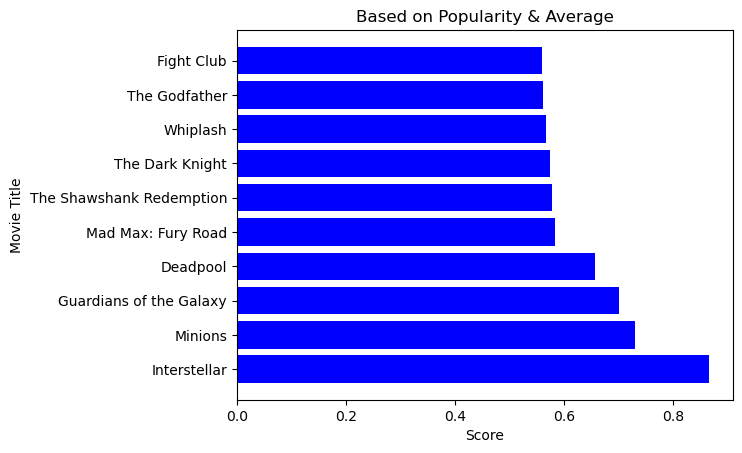

In [52]:
plt.barh(scores_df['original_title'].head(10),scores_df['score'].head(10),color = 'blue')
plt.title("Based on Popularity & Average")
plt.xlabel('Score')
plt.ylabel('Movie Title')
plt.show()

# Content Based Filtering

In [53]:
data['Soup']= data['Keywords'].astype(str)+data['Actors'].astype(str)+data['Director'].astype(str)+data['Genres'].astype(str)

In [54]:
data.head(3)

,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors,Weighted_Average_Rating,normalized_weight_average,normalized_popularity,score,Soup
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.148013,0.674339,0.171815,0.423077,"['culture clash', 'future', 'space war', 'spac..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.807627,0.581403,0.158846,0.370124,"['ocean', 'drug abuse', 'exotic island', 'east..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,Spectre,6.3,4466,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...",Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.276075,0.436273,0.122635,0.279454,"['spy', 'based on novel', 'secret agent', 'seq..."


In [55]:
data = data.reset_index()
indices = pd.Series(data.index, index=data['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [63]:
def get_recommendation(title, cosine_sim=cosine_sim1):
    idx = indices[title]
    scores = list(enumerate(cosine_sim[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:11]
    movie_indices = [i[0] for i in scores]
    return data['title'].iloc[movie_indices]

In [64]:
tdif = TfidfVectorizer()
tdif_matrix = tdif.fit_transform(data['overview'])

In [65]:
cosine_sim1 = linear_kernel(tdif_matrix, tdif_matrix)

In [66]:
get_recommendation('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
1181                                        JFK
210                              Batman & Robin
9            Batman v Superman: Dawn of Justice
Name: title, dtype: object

In [67]:
get_recommendation('The Avengers')

7                   Avengers: Age of Ultron
3311                  Thank You for Smoking
4124                     This Thing of Ours
3144                                Plastic
588         Wall Street: Money Never Sleeps
4620                   Fighting Tommy Riley
1892                             The Losers
2433       Superman IV: The Quest for Peace
85      Captain America: The Winter Soldier
580                      Olympus Has Fallen
Name: title, dtype: object

In [68]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(data['Soup'])

In [69]:
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [70]:
get_recommendation('The Godfather', cosine_sim2)

2731          The Godfather: Part II
867          The Godfather: Part III
1018                 The Cotton Club
4209                The Conversation
1728                We Own the Night
3831                   In Cold Blood
1847                      GoodFellas
3293                     10th & Wolf
1421                           Hoffa
2192    The Greatest Story Ever Told
Name: title, dtype: object

In [71]:
get_recommendation('The Losers', cosine_sim2)

4554                                       Subconscious
2688                                  A Perfect Getaway
4798                                        El Mariachi
2973    For Greater Glory - The True Story of Cristiada
2931                                       Corky Romano
356                                     Sherlock Holmes
1503                                             Takers
3318                                 Witless Protection
732                                            Paycheck
3500                                        Lucky Break
Name: title, dtype: object

# Collaborative Filtering

In [72]:
rating = pd.read_csv("rating.csv")

In [73]:
rating.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [74]:
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(5)

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [75]:
rating.rename(columns = {'movieId':'id','rating':'Rating','userId':'User_ID'},inplace = True)

In [76]:
rating.columns

Index(['User_ID', 'id', 'Rating'], dtype='object')

In [77]:
data.columns

Index(['index', 'id', 'original_title', 'overview', 'popularity', 'title',
       'vote_average', 'vote_count', 'Genres', 'Keywords', 'Director',
       'Actors', 'Weighted_Average_Rating', 'normalized_weight_average',
       'normalized_popularity', 'score', 'Soup'],
      dtype='object')

In [78]:
data_1 = pd.merge(data,rating)

In [79]:
data_1.head(2)

,index,id,original_title,overview,popularity,title,vote_average,vote_count,Genres,Keywords,Director,Actors,Weighted_Average_Rating,normalized_weight_average,normalized_popularity,score,Soup,User_ID,Rating
0,1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.807627,0.581403,0.158846,0.370124,"['ocean', 'drug abuse', 'exotic island', 'east...",741,0.5
1,1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.807627,0.581403,0.158846,0.370124,"['ocean', 'drug abuse', 'exotic island', 'east...",821,3.0


In [80]:
pvt = data_1.pivot_table(index ='User_ID',columns = 'original_title',values='Rating' )

In [81]:
pvt.head(5)

original_title,10 Things I Hate About You,12 Angry Men,127 Hours,1408,15 Minutes,16 Blocks,2 Fast 2 Furious,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,...,ハウルの動く城,七人の侍,三枪拍案惊奇,千と千尋の神隠し,卧虎藏龙,英雄,金陵十三釵,괴물,올드보이,친절한 금자씨
User_ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
pvt.columns

Index(['10 Things I Hate About You', '12 Angry Men', '127 Hours', '1408',
       '15 Minutes', '16 Blocks', '2 Fast 2 Furious',
       '20,000 Leagues Under the Sea', '2001: A Space Odyssey', '2046',
       ...
       'ハウルの動く城', '七人の侍', '三枪拍案惊奇', '千と千尋の神隠し', '卧虎藏龙', '英雄', '金陵十三釵', '괴물',
       '올드보이', '친절한 금자씨'],
      dtype='object', name='original_title', length=1299)

In [83]:
movie_watched = pvt["You Kill Me"]
similar_with_other_movies = pvt.corrwith(movie_watched)  
similar_with_other_movies = similar_with_other_movies.sort_values(ascending=False)
similar_with_other_movies.head()

/Users/pragna/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/pragna/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/pragna/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/pragna/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/pragna/.local/lib/python3.9/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


original_title
GoodFellas                                      1.0
Star Wars: Episode III - Revenge of the Sith    1.0
Sweet Sweetback's Baadasssss Song               1.0
Taken                                           1.0
Along Came a Spider                             1.0
dtype: float64

In [84]:
movie_watched = pvt["2 Fast 2 Furious"]
similar_with_other_movies = pvt.corrwith(movie_watched)  
similar_with_other_movies = similar_with_other_movies.sort_values(ascending=False)
similar_with_other_movies.head()

original_title
Austin Powers: International Man of Mystery    1.0
8MM                                            1.0
L'Auberge espagnole                            1.0
Jeepers Creepers                               1.0
A Scanner Darkly                               1.0
dtype: float64